# **DecisionTree**

## Data Spesies Hewan dalam Genus yang sama
data 2Panthera onca (Jaguar) dan Panthera pardus (Macan Tutul), masing-masing dengan fitur Panjang Tubuh (cm) dan Berat Tubuh (kg).

| No | Spesies         | Ukuran Panjang Tubuh (cm) | Ukuran Berat Tubuh (kg) |
| -- | --------------- | ------------------------- | ----------------------- |
| 1  | Panthera onca   | 174                       | 95                      |
| 2  | Panthera onca   | 169                       | 91                      |
| 3  | Panthera onca   | 176                       | 99                      |
| 4  | Panthera onca   | 162                       | 86                      |
| 5  | Panthera onca   | 181                       | 107                     |
| 6  | Panthera pardus | 149                       | 59                      |
| 7  | Panthera pardus | 144                       | 57                      |
| 8  | Panthera pardus | 154                       | 63                      |
| 9  | Panthera pardus | 147                       | 58                      |
| 10 | Panthera pardus | 151                       | 60                      |
| 11 | Panthera onca   | 179                       | 103                     |
| 12 | Panthera pardus | 146                       | 61                      |
| 13 | Panthera onca   | 173                       | 97                      |
| 14 | Panthera pardus | 148                       | 56                      |
| 15 | Panthera onca   | 167                       | 94                      |


Berikut adalah **perhitungan manual** *Entropy*, *Information Gain*, dan *Gini Index* untuk data **Panthera onca** dan **Panthera pardus** dengan **fitur: Panjang Tubuh (cm)**, seperti yang diminta.

---

##  1. Jumlah Data berdasarkan Kelas

Total data: **15**

* **Panthera onca**: 8 data
* **Panthera pardus**: 7 data

---

##  2. Data Panjang Tubuh (cm) - Urutan Naik

| No | Panjang | Kelas           |
| -- | ------- | --------------- |
| 7  | 144     | Panthera pardus |
| 12 | 146     | Panthera pardus |
| 14 | 148     | Panthera pardus |
| 9  | 147     | Panthera pardus |
| 6  | 149     | Panthera pardus |
| 10 | 151     | Panthera pardus |
| 8  | 154     | Panthera pardus |
| 4  | 162     | Panthera onca   |
| 2  | 169     | Panthera onca   |
| 15 | 167     | Panthera onca   |
| 1  | 174     | Panthera onca   |
| 13 | 173     | Panthera onca   |
| 3  | 176     | Panthera onca   |
| 11 | 179     | Panthera onca   |
| 5  | 181     | Panthera onca   |


---

##  3. Threshold Split
Kita ambil threshold = 154 cm (pemisah terakhir antara pardus dan onca).

* Left (≤ 154 cm): No 7, 12, 14, 9, 6, 10, 8 → 7 data

* Right (> 154 cm): No 4, 2, 15, 1, 13, 3, 11, 5 → 8 data

---

## 4. Entropy Setelah Split

###  Left (≤ 62 kg)

* 7 data, semua **Panthera pardus**

$$
Entropy(left) = -1 \cdot \log_2(1) = \boxed{0}
$$

---

###  Right (> 62 kg)

* 8 data, semua **Panthera onca**

$$
Entropy(right) = -1 \cdot \log_2(1) = \boxed{0}
$$

---

###  Information Gain

$$
IG = Entropy(D) - \left( \frac{7}{15} \cdot 0 + \frac{8}{15} \cdot 0 \right) = \boxed{0.996}
$$

---

##  5. Gini Index

###  Gini Awal

$$
Gini(D) = 1 - \left(\frac{8}{15}\right)^2 - \left(\frac{7}{15}\right)^2 \\
= 1 - 0.284 - 0.218 = \boxed{0.498}
$$

---

###  Gini Left (≤ 62 kg)

Semua **Panthera pardus** (7 data):

$$
Gini(left) = 1 - 1^2 = \boxed{0}
$$

---

###  Gini Right (> 62 kg)

Semua **Panthera onca** (8 data):

$$
Gini(right) = 1 - 1^2 = \boxed{0}
$$

---

###  Gini Split

$$
Gini_{split} = \frac{7}{15} \cdot 0 + \frac{8}{15} \cdot 0 = \boxed{0}
$$

---

##  Ringkasan Hasil — Fitur **Berat Tubuh (kg)**

| Ukuran Evaluasi  | Nilai  |
| ---------------- | ------ |
| Entropy Awal     | 0.996  |
| Information Gain | 0.996  |
| Gini Awal        | 0.4978 |
| Gini Split       | 0      |




Berikut adalah **kesimpulan perbandingan dua fitur** berdasarkan **data Panthera onca vs Panthera pardus** dan perhitungan sebelumnya:

---

##  Kesimpulan Perbandingan Dua Fitur:
| Fitur         | Information Gain | Gini Index |
| ------------- | ---------------- | ---------- |
| Panjang Tubuh | 0.996            | 0          |
| Berat Tubuh   | 0.996            | 0          |


Kedua fitur **(Panjang Tubuh dan Berat Tubuh)** sama-sama memberikan pemisahan yang sempurna dengan **Information Gain maksimum** dan **Gini Split minimum** (0).
Sehingga, keduanya sangat baik digunakan sebagai split pertama.
> yang berarti pemisahan kelas paling sempurna terjadi pada fitur ini.






## Visualisasi Decision Tree

Ini adalah code program untuk mencari decision tree sekaligus rules

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# === Data Terbaru ===
data = {
    "Panjang Tubuh (cm)": [174, 169, 176, 162, 181, 149, 144, 154, 147, 151, 179, 146, 173, 148, 167],
    "Berat Tubuh (kg)": [95, 91, 99, 86, 107, 59, 57, 63, 58, 60, 103, 61, 97, 56, 94],
    "Kelas": [
        "Panthera onca", "Panthera onca", "Panthera onca", "Panthera onca", "Panthera onca",
        "Panthera pardus", "Panthera pardus", "Panthera pardus", "Panthera pardus", "Panthera pardus",
        "Panthera onca", "Panthera pardus", "Panthera onca", "Panthera pardus", "Panthera onca"
    ]
}

df = pd.DataFrame(data)

# === Label Encoding ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])  # Panthera onca = 1, Panthera pardus = 0

# === Fitur dan Target ===
X = df[["Panjang Tubuh (cm)", "Berat Tubuh (kg)"]]
y = df["Label"]

# === Train Decision Tree ===
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# === Output Pohon Keputusan Saja ===
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- Panjang Tubuh (cm) <= 158.00
|   |--- class: 1
|--- Panjang Tubuh (cm) >  158.00
|   |--- class: 0



## Visualisasi Splitting

|--- Panjang Tubuh (cm) <= 158.00
|   |--- class: 1
|--- Panjang Tubuh (cm) >  158.00
|   |--- class: 0


=== Prediksi 2 Data Baru ===
Data 1: Panjang=140, Berat=90 → Prediksi: Panthera pardus
Data 2: Panjang=179, Berat=89 → Prediksi: Panthera onca


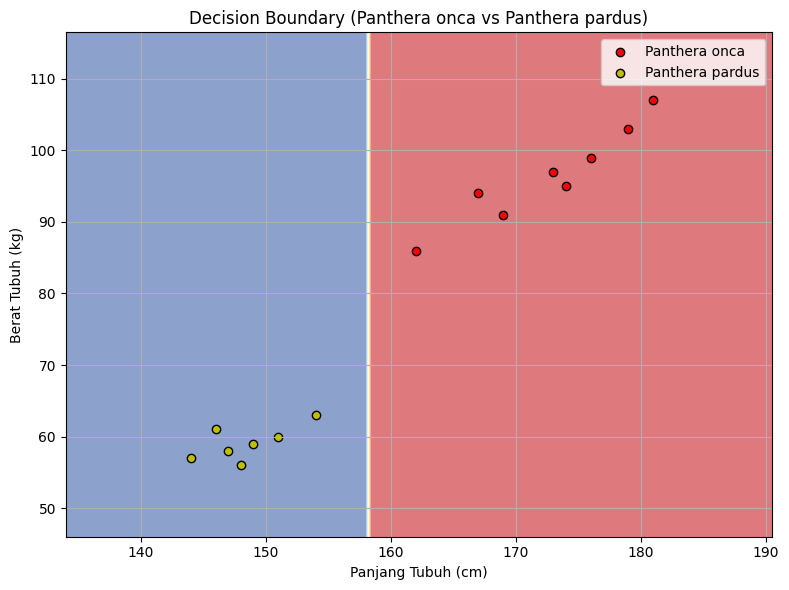

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# === Data Terbaru ===
data = {
    "Panjang Tubuh (cm)": [174, 169, 176, 162, 181, 149, 144, 154, 147, 151, 179, 146, 173, 148, 167],
    "Berat Tubuh (kg)": [95, 91, 99, 86, 107, 59, 57, 63, 58, 60, 103, 61, 97, 56, 94],
    "Kelas": [
        "Panthera onca", "Panthera onca", "Panthera onca", "Panthera onca", "Panthera onca",
        "Panthera pardus", "Panthera pardus", "Panthera pardus", "Panthera pardus", "Panthera pardus",
        "Panthera onca", "Panthera pardus", "Panthera onca", "Panthera pardus", "Panthera onca"
    ]
}

df = pd.DataFrame(data)

# === Label Encoding ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])  # Panthera onca = 1, Panthera pardus = 0

# === Fitur dan Target ===
X = df[["Panjang Tubuh (cm)", "Berat Tubuh (kg)"]]
y = df["Label"]

# === Train Decision Tree ===
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# === Tampilkan Pohon Keputusan ===
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# === Uji 2 Data Baru ===
uji_baru = pd.DataFrame({
    'Panjang Tubuh (cm)': [140, 179],
    'Berat Tubuh (kg)': [90, 89]
})

# Prediksi menggunakan model decision tree yang sudah dilatih
prediksi = clf.predict(uji_baru)
hasil = le.inverse_transform(prediksi)

print("\n=== Prediksi 2 Data Baru ===")
for i, (p, b) in enumerate(zip(uji_baru['Panjang Tubuh (cm)'], uji_baru['Berat Tubuh (kg)'])):
    print(f"Data {i+1}: Panjang={p}, Berat={b} → Prediksi: {hasil[i]}")

# === Visualisasi Decision Boundary ===
plot_colors = "ry"
plot_step = 0.5  # Lebih halus dari 1.0

# Rentang axis
x_min, x_max = X['Panjang Tubuh (cm)'].min() - 10, X['Panjang Tubuh (cm)'].max() + 10
y_min, y_max = X['Berat Tubuh (kg)'].min() - 10, X['Berat Tubuh (kg)'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Buat prediksi di seluruh grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['Panjang Tubuh (cm)', 'Berat Tubuh (kg)'])
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

# Plot kontur dan titik data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot titik training data
for label, color in zip([0, 1], plot_colors):
    idx = np.where(y == label)
    plt.scatter(X.iloc[idx]['Panjang Tubuh (cm)'], X.iloc[idx]['Berat Tubuh (kg)'],
                c=color, edgecolor='k', label=le.inverse_transform([label])[0])

plt.xlabel("Panjang Tubuh (cm)")
plt.ylabel("Berat Tubuh (kg)")
plt.title("Decision Boundary (Panthera onca vs Panthera pardus)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi Splitting Setelah ada 2 Data Baru


=== Visualisasi Decision Boundary ===


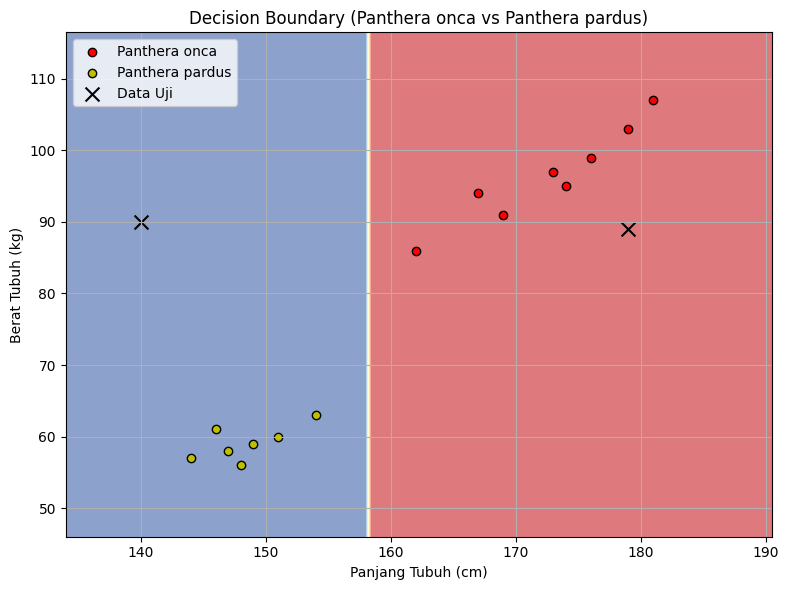

In [11]:
# === Visualisasi Decision Boundary ===
print("\n=== Visualisasi Decision Boundary ===")
plot_colors = "ry"
plot_step = 0.5  # Lebih halus dari 1.0

# Rentang axis
x_min, x_max = X['Panjang Tubuh (cm)'].min() - 10, X['Panjang Tubuh (cm)'].max() + 10
y_min, y_max = X['Berat Tubuh (kg)'].min() - 10, X['Berat Tubuh (kg)'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Buat prediksi di seluruh grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['Panjang Tubuh (cm)', 'Berat Tubuh (kg)'])
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

# Plot kontur dan titik data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot titik training data
for label, color in zip([0, 1], plot_colors):
    idx = np.where(y == label)
    plt.scatter(X.iloc[idx]['Panjang Tubuh (cm)'], X.iloc[idx]['Berat Tubuh (kg)'],
                c=color, edgecolor='k', label=le.inverse_transform([label])[0])

# Plot titik data uji
plt.scatter(uji_baru['Panjang Tubuh (cm)'], uji_baru['Berat Tubuh (kg)'],
            c='black', marker='x', s=100, label='Data Uji')

plt.xlabel("Panjang Tubuh (cm)")
plt.ylabel("Berat Tubuh (kg)")
plt.title("Decision Boundary (Panthera onca vs Panthera pardus)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Visualisasi Decision Tree dalam bentuk gambar

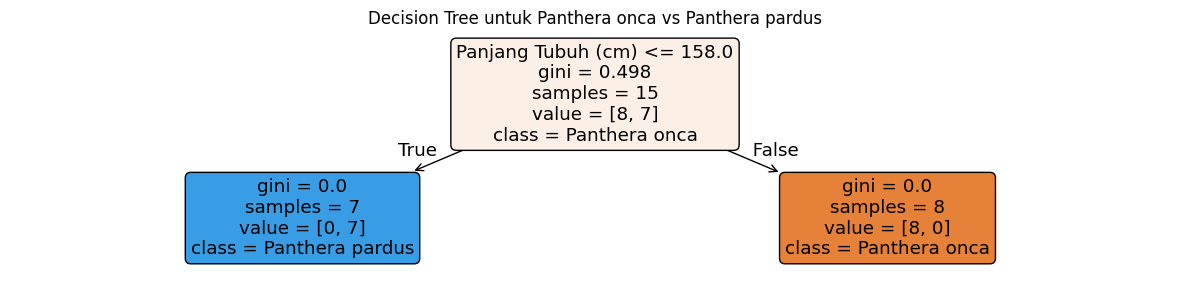

In [6]:
# === Visualisasi Struktur Pohon ===
plt.figure(figsize=(12, 3))
plot_tree(
    clf,
    feature_names=["Panjang Tubuh (cm)", "Berat Tubuh (kg)"],
    class_names=le.classes_,  # gunakan label string hasil encoding
    filled=True,
    rounded=True,
    impurity=True  # tampilkan nilai Gini
)
plt.title("Decision Tree untuk Panthera onca vs Panthera pardus")
plt.tight_layout()
plt.show()
